In [11]:
import numpy as np
from stingray.pulse.search import epoch_folding_search
import matplotlib.pyplot as plt
from stingray import Lightcurve
from stingray.events import EventList
from ef_search import search

In [2]:
def sinusoid(times, frequency, baseline, amplitude, phase):
    return baseline + amplitude * np.sin(2 * np.pi * (frequency * times + phase))

In [3]:
period = 400
mean_countrate = 50
pulsed_fraction = .4
bin_time = 0.01
obs_length = 3000

t = np.arange(0, obs_length, bin_time)

# The continuous light curve
counts = sinusoid(t, 1 / period, mean_countrate,
                  0.5 * mean_countrate * pulsed_fraction, 0) * bin_time
lc = Lightcurve(t, counts, gti=[[-bin_time / 2, obs_length + bin_time / 2]],
                dt=bin_time)

In [4]:
# use the light curve above to simulate an event list for this pulsar.
events = EventList()
events.simulate_times(lc)

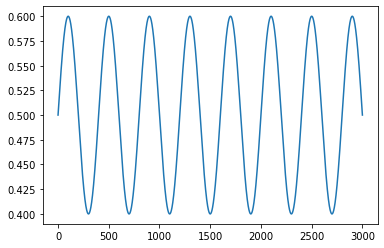

In [5]:
plt.plot(t,lc)

In [9]:
periods,chi2 = search(times=events.time,period_min=300,period_max=500)

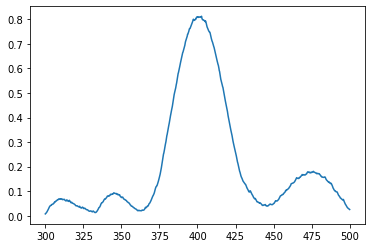

In [10]:
plt.plot(periods,chi2)